In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [110]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.datasets import mnist
from sklearn.datasets import make_moons

In [4]:
import numpy as np
import model
import layers

In [5]:
def createSpiral(N):
    N = int(N/2)
    theta = np.sqrt(np.random.rand(N))*2*np.pi # np.linspace(0,2*pi,100)

    r_a = 2*theta + np.pi
    data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
    x_a = data_a + np.random.randn(N,2)
    y_a = np.zeros((N,))

    r_b = -2*theta - np.pi
    data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
    x_b = data_b + np.random.randn(N,2)
    y_b = np.ones((N,))
    
    X = np.concatenate((x_a,x_b),axis=0)
    y = np.concatenate((y_a,y_b),axis=0)
    
    X,y = shuffle(X,y)
    return X,y

In [6]:
def vectorize(y):
    out = np.zeros((len(y),10))
    for i,each in enumerate(y):
        out[i][each] = 1
    
    return out

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(-1,784).astype('float32') / 255.0
x_test = x_test.reshape(-1,784).astype('float32') / 255.0


In [ ]:
y_train = vectorize(y_train)
y_test = vectorize(y_test)

In [120]:
Xa,ya = make_moons(n_samples=1000,noise=0.1)

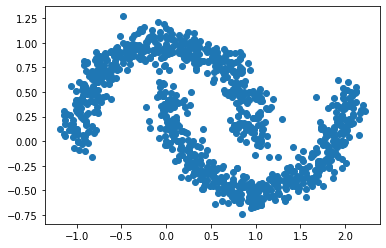

In [121]:
plt.scatter(Xa[:,0],Xa[:,1])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(Xa, ya, test_size=0.33, random_state=42)

In [123]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [124]:
y_train.shape

(670, 1)

In [134]:
mdl = model.model([
    layers.dense(256,activation='sig',input_shape=2),
    layers.dense(64,activation='sig'),
    layers.dense(1,activation='sig')
])

In [135]:
loss = mdl.fit(X_train,y_train,epochs=100)

Epoch : 0 , loss : 0.49691951501004344
Epoch : 1 , loss : 0.4969142331664332
Epoch : 2 , loss : 0.49690835612139217
Epoch : 3 , loss : 0.496901780274667
Epoch : 4 , loss : 0.49689437702999345
Epoch : 5 , loss : 0.4968859849030248
Epoch : 6 , loss : 0.49687639848076703
Epoch : 7 , loss : 0.49686535268123916
Epoch : 8 , loss : 0.49685249983244956
Epoch : 9 , loss : 0.49683737548941737
Epoch : 10 , loss : 0.4968193460578849
Epoch : 11 , loss : 0.49679752601853827
Epoch : 12 , loss : 0.4967706423434369
Epoch : 13 , loss : 0.49673680293284184
Epoch : 14 , loss : 0.4966930810443141
Epoch : 15 , loss : 0.4966347236606005
Epoch : 16 , loss : 0.49655352888999715
Epoch : 17 , loss : 0.4964341989056841
Epoch : 18 , loss : 0.49624509871989103
Epoch : 19 , loss : 0.4959107010315376
Epoch : 20 , loss : 0.49520761197101476
Epoch : 21 , loss : 0.49319275815041796
Epoch : 22 , loss : 0.4817142150596897
Epoch : 23 , loss : 0.18385665178542107
Epoch : 24 , loss : 0.5028959413460198
Epoch : 25 , loss : 0.

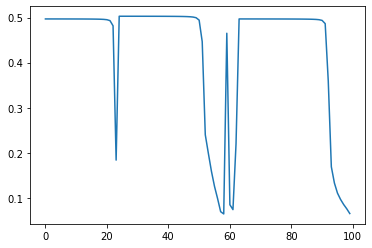

In [136]:
plt.plot(loss)

In [137]:
mdl.score(X_test,y_test)

0.9303030303030303

In [ ]:
x = x_train
a1 = mdl.lst[0].process(x)
a2 = mdl.lst[1].process(a1)
a3 = mdl.lst[2].process(a2)

In [ ]:
a3_ = np.dot(a2,mdl.lst[2].W.T) + mdl.lst[2].b

In [ ]:
a3_ = np.exp(a3_) / np.sum(np.exp(a3_),axis=1).reshape(-1,1)

In [ ]:
np.sum(a3_[0])

In [ ]:
a3_

In [29]:
def make_grid(X,model):
    xmn, xmx = X[:, 0].min() - 1, X[:, 0].max() + 1
    ymn, ymx = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx,yy = np.meshgrid(np.arange(xmn,xmx,0.1),np.arange(ymn,ymx,0.1))
    XX_grid = np.c_[xx.ravel(),yy.ravel()]
    grid_preds = model.predict(XX_grid)
    grid_preds = grid_preds.reshape(xx.shape)
    return xx,yy,grid_preds


In [138]:
xx,yy,grid_preds = make_grid(Xa,mdl)

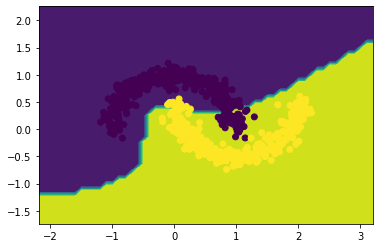

In [139]:
plt.contourf(xx,yy,grid_preds)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [ ]:
(mdl.lst[1].A * np.mean(mdl.lst[1].W,axis=1).reshape(1,-1)).shape

In [ ]:
np.mean(mdl.lst[1].W,axis=1).reshape(1,-1).shape